In [3]:
import pandas as pd

In [7]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats


### Feature Selection on Diabetes Data

In [8]:
data = datasets.load_diabetes()

In [9]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

In [10]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


array([<Axes: title={'center': '-0.044641636506989144'}>,
       <Axes: title={'center': '0.05068011873981862'}>], dtype=object)

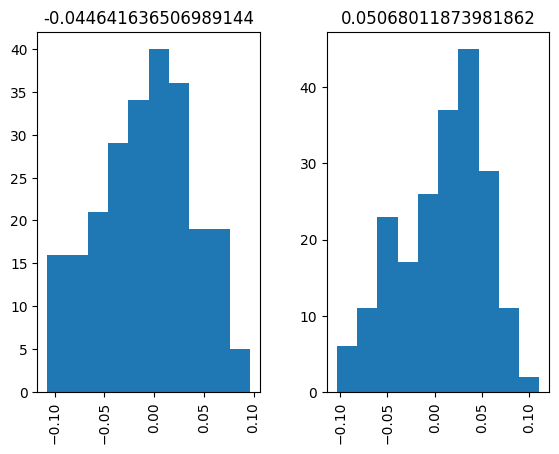

In [11]:
df.hist('age',by='sex')

In [12]:
sugar_male = df[df["sex"] > 0]["s1"]  # s1 is blood sugar
sugar_female = df[df["sex"] <= 0]["s1"]

In [13]:
t_stat, p_value = stats.ttest_ind(sugar_male, sugar_female)

In [14]:
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject null hypothesis: Significant difference in blood sugar levels.")
else:
    print("Fail to reject null hypothesis: No significant difference.")

T-statistic: 0.740, P-value: 0.459
Fail to reject null hypothesis: No significant difference.


In [15]:
df["target_category"] = df["target"].apply(lambda x: "High" if x>120 else "Low")

In [16]:
low_group = df[df["target_category"] == "Low"]["bmi"]
high_group = df[df["target_category"] == "High"]["bmi"]

In [17]:
# T-test: Compare means of Two Groups (BMI Ranges)
t_stat, t_p_value = stats.ttest_ind(low_group, high_group, equal_var=False)
print(f"T-Test for bmi: p-value = {t_p_value:.5f}")

if p_value < 0.05:
    print("Reject null hypothesis: BMI significantly affects diabetes progression.")
else:
    print("Fail to reject null hypothesis: No significant effect of BMI.")

T-Test for bmi: p-value = 0.00000
Fail to reject null hypothesis: No significant effect of BMI.


In [18]:
# ANOVA: Compare More Than Two Groups (Age Ranges)

df["age_group"] = pd.qcut(df["age"], q=3, labels=["Young", "Middle", "Old"])  # Create 3 Age Groups
anova_groups = [df[df["age_group"] == age]["target"] for age in ["Young", "Middle", "Old"]]

anova_stat, anova_p_value = stats.f_oneway(*anova_groups)
print(f"ANOVA across age groups: p-value = {anova_p_value:.5f}")

if p_value < 0.05:
    print("Reject null hypothesis: Age significantly affects diabetes progression.")
else:
    print("Fail to reject null hypothesis: No significant effect of BMI.")

ANOVA across age groups: p-value = 0.00076
Fail to reject null hypothesis: No significant effect of BMI.


In [19]:
anova_groups[0].mean(), anova_groups[1].mean(), anova_groups[2].mean()

(135.63945578231292, 151.52631578947367, 169.73426573426573)

In [20]:
# Chi-Square Test: Check Independence Between Two Categorical Variables
from scipy.stats import chi2_contingency

# Convert continuous feature to categorical for Chi-Square
df["bmi_category"] = pd.qcut(df["bmi"], q=3, labels=["Low", "Medium", "High"])

# Create contingency table (Cross-tabulation)
contingency_table = pd.crosstab(df["bmi_category"], df["target_category"])
print(contingency_table)

chi2_stat, chi2_p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test for BMI Category vs Diabetes Category: p-value = {chi2_p:.5f}")

if p_value < 0.05:
    print("Reject null hypothesis: BMI significantly affects diabetes progression.")
else:
    print("Fail to reject null hypothesis: No significant effect of BMI.")

target_category  High  Low
bmi_category              
Low                46  101
Medium             83   65
High              129   18
Chi-Square Test for BMI Category vs Diabetes Category: p-value = 0.00000
Fail to reject null hypothesis: No significant effect of BMI.


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,target_category,age_group,bmi_category
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,High,Old,High
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,Low,Middle,Low
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,High,Old,High
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,High,Young,Medium
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,High,Middle,Low


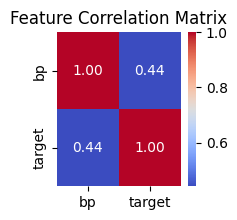

In [26]:
# Correlation Analysis: Continuous Features Relationship
correlation_matrix = df[['bp','target']].corr()
plt.figure(figsize=(2,2))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

====================================================================================

### Feature selection on iris data

In [13]:
# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target


In [14]:
# 1. T-Test: Compare sepal length means between two species (0 and 1)
species_0 = iris_df[iris_df['target'] == 0]['sepal length (cm)']
species_1 = iris_df[iris_df['target'] == 1]['sepal length (cm)']
t_stat, p_value_ttest = stats.ttest_ind(species_0, species_1)

In [15]:
# 2. Chi-square Test: Checking independence between target and discretized sepal length
iris_df['sepal_length_category'] = pd.qcut(iris_df['sepal length (cm)'], q=3, labels=['small', 'medium', 'large'])
contingency_table = pd.crosstab(iris_df['target'], iris_df['sepal_length_category'])
chi2_stat, p_value_chi2, _, _ = stats.chi2_contingency(contingency_table)

In [16]:
# 3. ANOVA: Comparing means of sepal width across three species
species_0_sw = iris_df[iris_df['target'] == 0]['sepal width (cm)']
species_1_sw = iris_df[iris_df['target'] == 1]['sepal width (cm)']
species_2_sw = iris_df[iris_df['target'] == 2]['sepal width (cm)']
anova_stat, p_value_anova = stats.f_oneway(species_0_sw, species_1_sw, species_2_sw)

In [18]:
# Store results with conclusions
hypothesis_results = {
    "T-Test (species 0 vs 1, sepal length)": (t_stat, p_value_ttest, "Significant difference in sepal length between species 0 and 1." if p_value_ttest < 0.05 else "No significant difference."),
    "Chi-Square Test (target vs sepal length category)": (chi2_stat, p_value_chi2, "Significant association between species and sepal length category." if p_value_chi2 < 0.05 else "No significant association."),
    "ANOVA (sepal width across species)": (anova_stat, p_value_anova, "Significant difference in sepal width across species." if p_value_anova < 0.05 else "No significant difference.")
}

In [19]:


# Print results
for test_name, (stat, p_value, conclusion) in hypothesis_results.items():
    print(f"{test_name}:\n  Statistic = {stat:.4f}, p-value = {p_value:.4e}\n  Conclusion: {conclusion}\n")

T-Test (species 0 vs 1, sepal length):
  Statistic = -10.5210, p-value = 8.9852e-18
  Conclusion: Significant difference in sepal length between species 0 and 1.

Chi-Square Test (target vs sepal length category):
  Statistic = 123.2830, p-value = 1.0624e-25
  Conclusion: Significant association between species and sepal length category.

ANOVA (sepal width across species):
  Statistic = 49.1600, p-value = 4.4920e-17
  Conclusion: Significant difference in sepal width across species.

